#**Informe Inteligencia Artificial**
#**Proyecto Maze-Solver**
#**Universidad Nacional de Colombia**
##David Camilo Cortés Salazar
##Stiven Leonardo Sánchez León
##Ricardo Andrés Marino Rojas

# **Punto 1**
## Explique qué es una heurística en problema del laberinto, proponga dos heurísticas y explique cómo pueden ayudar a resolver mejor el problema del laberinto.

Una heurística es una forma de resolver cierto problema utilizando un método práctico, que usualmente se desarrolla utilizando información a priori sobre el entorno del problema. Si bien no garantiza obtener la solución óptima o eficiente, retorna una solución o aproximación admisible.

En muchos casos, cuando el contexto del problema de búsqueda es muy relacionado con coordenadas cartesianas se suele utilizar como heurística la distancia euclidiana buscando en cada paso escoger la posición que este más cerca del objetivo en distancia euclidiana. En la actualidad, esta heurística se utiliza en diferentes videojuegos de mundo abierto para indicarle al jugador cuál es la ruta más corta hacia su próxima misión. Si en el mapa esta permitido moverse en una discretización de cualquier dirección dentro de los $360^{\circ}$ usar la distancia euclidiana será la mejor opción porque se podrá seguir paso a paso la distancia mas corta entre los puntos de inicio y fin.

Otra heurística similar a esta última es la distancia Chebyshev, definida de la siguiente manera: Dados dos vectores $x$ y $y$ en $\mathbb{R}^{n}$, la métrica Chebyshev entre estos dos es
$$D_{Chebyshev}(x, y) := \max_{i} |x_{i} - y_{i}|$$
Esta heurística resulta particularmente útil en la logística de depósitos, debido a que mide efectivamente el tiempo que una grúa aérea toma moviendo un objeto $x$ de una posición $A$ a una posición $B$. Esto es debido a que la grúa se mueve a lo largo del eje $x$ y el eje $y$ al mismo tiempo, pero a la misma velocidad por ambos ejes. Si en el maze está permitido además de moverse *norte, sur, oeste* y *este* moverse en direcciones diagonales como: *noroeste,  noreste, suroeste* y *sureste*, con el mismo costo para cada una de estas ocho posibles direcciones, la distancia Chebyshev será la mejor por la misma naturaleza en la que define la distancia entre dos puntos.

#**Punto 2**
## Explique brevemente el algoritmo de búsqueda greedy. En particular, su estrategia de exploración y la representación de la frontera.

Un algoritmo de busquéda greedy es un algoritmo bastante similar al BFS con la única diferencia que este expande primero el nodo con el menor valor $h(n)$, es decir el nodo con el menor valor según cierta heurística $h$ sin tomar en cuenta información anterior. Puesto que a diferencia del BFS este algoritmo expande el nodo con menor valor $h(n)$, en lugar de utilizar una cola común se utiliza mejor una cola de prioridad en la cuál se utiliza $h(n)$ como "orden". Con este tipo de estructura de datos, acceder y eliminar el elemento con menor valor $h(n)$ es hecho en $O(\log{n})$ e insertar puede llegar a hacerse en $O(1)$. Este algoritmo es completo en espacios finitos pero no en infinitos. Si bien su complejidad en términos de tiempo y espacio es $O(|V|)$  ($|V|$ es la cantidad de nodos en el grafo asociado al entorno donde se utiliza), utilizando una buena heurística este algoritmo podría llegar a reducirse en ciertos problemas a $O(bm)$ donde $b$ es el factor de expansión en cada nodo(cantidad de posibles hijos por nodo) y $m$ la altura del árbol de busqueda asociado al problema de búsqueda.

#**Punto 3**
## Explique brevemente el algoritmo A*. En particular, la estrategia de búsqueda y la representación de la frontera.

$A*$ es un BFS(Breath First Search) que utiliza como función de evaluación
$$f(n) = g(n) + h(n)$$
donde $g(n)$ es el costo total del camino desde el nodo inicial hasta el presente nodo $n$, y $h(n)$ es el costo *estimado* desde el presente nodo $n$ hasta el nodo objetivo. De este modo, tenemos que
$$f(n) = \text{Costo estimado del mejor camino que pasa por el nodo n hasta el nodo objetivo}$$

Usualmente para implementar este algoritmo se utiliza una *cola de prioridad* para sacar repetidas veces el nodo con menor costo estimado. En cada paso del algoritmo $A*$ se necesita no sólo obtener dicho nodo sino también eliminarlo de la frontera. Utilizando una cola de prioridad esta operación se hace en tiempo $O(1)$ y toma sólo $O(\log n)$ para insertar un nuevo elemento, de modo que estas dos propiedades hacen de la cola de prioridad una estructura de datos eficiente para implementar este algoritmo.

#**Punto 4**
## Un algoritmo de búsqueda se dice admisible si tiene garantía de retornar una solución óptima. Si la función heurística utilizada por A* es admisible, entonces A* es admisible. Explique que es una heurística admisible, y pruebe la afirmación previa.

Aunque el algoritmo $A*$ es completo, para garantizar que el camino que encuentre al final es el mejor (de costo óptimo) se debe contar con una heurística $h(n)$ que cumpla ciertas propiedades, entre ellas la *admisibilidad*. Una heurística admisible es una que nunca *sobrestima* el costo para llegar al objetivo.

Para demostrar que si la heurística $h(n)$ es admisible entonces $A*$ retorna la ruta óptima en terminos de costo razonamos por contradcción: Supongamos que la ruta óptima tiene un costo $C^{*}$ pero que nuestro algoritmo retorno una ruta con costo $C > C^{*}$. Luego, la ruta de costo $C^{*}$ y la de costo $C$ deben diferir en cierto nodo $n$ que está en la ruta óptima pero no en la que retornó el algoritmo $A*$. De modo que si definimos $g^{*}(n)$ como el costo de la ruta óptima desde el inicio hasta el nodo $n$ y $h^{*}(n)$ como el costo de la ruta óptima desde el nodo $n$ hasta el nodo objetivo tenemos lo siguiente
$$f(n) > C^{*} \quad \text{De otro modo $n$ sería parte de la ruta de $C$}$$
$$f(n) = g(n) + h(n) \quad \text{Por definición}$$
$$f(n) = g^{*}(n) + h(n) \quad \text{$n$ está en una ruta óptima desde el nodo inicial hasta el presente nodo}$$
$$f(n) \leq g^{*}(n) + h^{*}(n) \quad \text{Por la admisibilidad, $h(n) \leq h^{*}(n)$}$$
$$f(n) \leq C^{*} \quad \text{Por definición, $C^{*} = g^{*}(n) + h^{*}(n)$}$$
La primera y la última línea llevan a una contradicción, de modo que suponer que $A*$ retorna una ruta subóptima es una afirmación erronea, por lo tanto $A*$ retorna una ruta o camino óptimo.

#**Punto 5**
##Un algoritmo A es óptimamente eficiente con respecto a un conjunto de algoritmos alternativos **Alts** en un conjunto de problemas **P** si para cada problema P en **P** y cada algoritmo A′ en **Alts**, el conjunto de nodos expandidos por A al resolver P es un subconjunto (posiblemente iguales) del conjunto de nodos expandidos por A′ al resolver P. El estudio definitivo de la optimalizad eficiente de A* se debe a Rina Dechter y Judea Pearl [2]. Quienes consideraron una variedad de definiciones de **Alts** y **P** en combinación con la heurística de A* siendo meramente admisible o consistente y admisible. El resultado positivo más interesante que demostraron es que $A*$, con una heurística consistente, es óptimamente eficiente con respecto a todos los algoritmos de búsqueda similares a A* admisibles en todos los problemas de búsqueda ′′no patológicos′′. Este resultado no se cumple si la heurística de A* es admisible pero no consistente. Explique en que consiste una heurística consistente, muestre un ejemplo de una heurística admisible pero no consistente, y pruebe el resultado de Dechter y Pearl [2].

En el estudio de problemas de encontrar rutas en inteligencia artificial, una heurística $h(n)$ es *consistente* si está estimación es siempre menor o igual que la distancia estimada desde otro nodo hijo al objetivo mas el costo de llegar a aquel nodo hijo desde el presente. Formalmente, para todo nodo $N$ y cada sucesor $P$ de este nodo, el costo estimado para llegar al nodo objetivo desde $N$ no es mayor que el costo de llegar a $P$ desde $N$ mas el costo estimado de llegar al objetivo desde $P$. Esto es:
$$h(N) \leq c(N, P) + h(P)$$
$$h(G) = 0$$
donde


*   $h$ es la heurística consistente usada
*   $N$ es un nodo cualquiera del grafo
*   $P$ es cualquier nodo hijo de $N$
*   $G$ es el nodo objetivo
*   $c(N,P)$ es el costo de ir desde $N$ hasta $P$ en el grafo

Veamos ahora un ejemplo de una heurística que es admisible pero no consistente. Para este ejemplo el problema será [*15 puzzle*](https://en.wikipedia.org/wiki/15_puzzle)) y utilizaremos la [Distancia Hamming](https://en.wikipedia.org/wiki/Hamming_distance). Primero, es fácil ver que la heurística Hamming es admisible puesto que el número total de *movidas* que tenemos que hacer para organizar las piezas del puzzle correctamente es por lo menos el número de piezas que están desorganizadas. Sin embargo, probemos que esta heurística no es consistente mostrando el siguiente contraejemplo: Consideremos la siguiente configuración del puzzle
$$\left[ {\begin{array}{cc}
4 & 6 & 2 & 8 \\
7 & 12 & 9 & 10 \\
11 & 13 & 1 & 5 \\
3 & 15 & 14 & x\\
\end{array} } \right]$$
Para esta configuración la distancia Hamming sería 15, puesto que sólo una pieza está en su puesto (la $x$), pero si nosotros movemos la pieza $14$ a la izquierda, obtenemos la siguiente configuración
$$\left[ {\begin{array}{cc}
4 & 6 & 2 & 8 \\
7 & 12 & 9 & 10 \\
11 & 13 & 1 & 5 \\
3 & 14 & 15 & x\\
\end{array} } \right]$$
Y en esta configuración la distancia hamming es de $13$ porque tanto el $14,15$ y $x$ están en su correcta posición. Para mover esta pieza hicimos un movimiento de costo $1$, luego tenemos que
$$h(n) = 15 > 1 + 13 = c(n, n') + h(n')$$
Por lo que concluimos que la heurística no es consistente pero si admisible.




Finalmente, demostremos que el algoritmo $A*$ es óptimo en búsqueda dentro de un grafo si la heurística $h(n)$ que utiliza es consistente.

El primer paso es probar lo siguiente: Si $h(n)$ es consistente, luego los valores de $f(n)$ a lo largo del camino o ruta que encuentra son no decrecientes. La prueba se sigue directamente de la definción de consistencia. Supongamos que $n'$ es un sucesor de $n$; luego $g(n')= g(n) + c(n,a,n')$ para alguna acción $a$, por lo tanto tenemos que
$$f(n')=g(n')+h(n')=g(n)+c(n,a,n')+h(n') \geq g(n) + h(n) = f(n)$$
El siguiente paso, es probar que siempre que $A*$ seleccione un nodo $n$ para expandir, el camino óptimo hacia ese nodo ha sido encontrado. Cuando este no es el caso, es porque debió haber otro nodo $n'$ de la frontera en el camino óptimo desde el nodo de inicio hasta $n$, por la propiedad de separación del grafo(la frontera separa los nodos inexplorados de los ya expandidos); como $f$ es no decreciente en ningún camino, $n'$ tuvo que tener un valor $f$ menor que el de $n$ de modo que fue seleccionado primero.

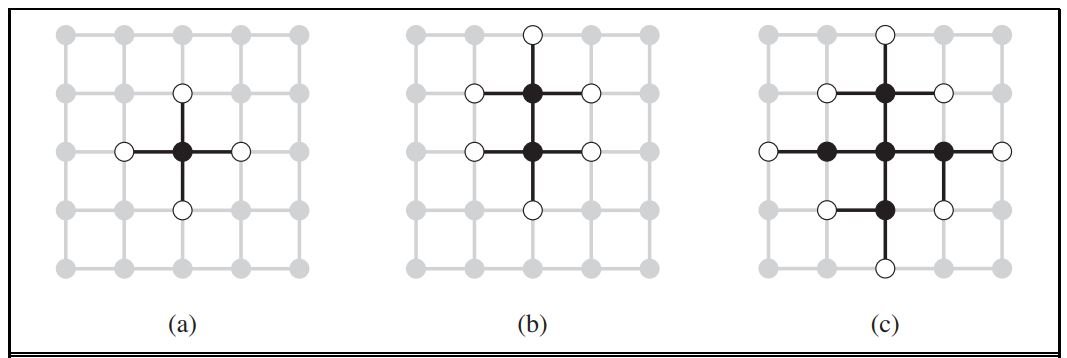

De estas dos obersvaciones podemos concluir que la sequencia de nodos expandidos por el algoritmo $A*$ esta en orden no decreciente por $f(n)$. De este modo, el primer nodo objetivo que selecciona para expandir debe estar en una solución óptima puesto que $f$ es el costo verdadero para nodos objetivos(que tienen $h(n)=0$) y todos los otros nodos objetivos tendrán un costo por lo menos igual al de este nodo objetivo.